## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import itertools as it

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression
import warnings
np.warnings.filterwarnings('ignore')

AttributeError: module 'numpy' has no attribute 'warnings'

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Distribution of response
*By Sylvia Sherwood*

In [ ]:
#...Plot for distribution of response...#

# Mean and standard deviation of response #

### Data cleaning
*By Sankaranarayanan Balasubramanian & Fiona Fe*

In [ ]:
#...Code with comments...#

# Imputing missing values #

### Data preparation
*By Ryu Kimiko*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [3]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model: Hyperparameter tuning

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Baseline Model
*By Luna Nguyen*

Accuracy:  86.14
Recall:  0.7163969035890219


/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

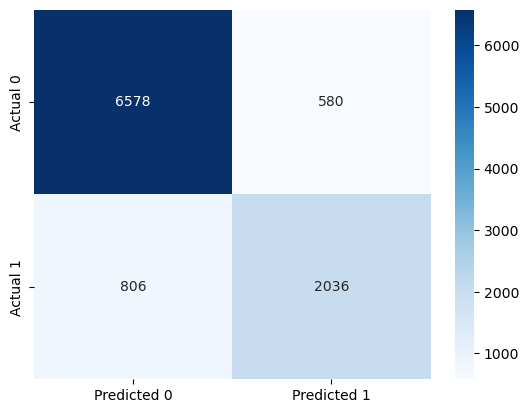

In [8]:
# Loading test and train data
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

# Dropping unnecessary columns
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)

# Separate into test and train
y_train = train.target
X_train = train.drop("target", axis = 1)

y_test = test.target
X_test = test.drop('target', axis = 1)

X_train_columns = X_train.columns
X_test_columns = X_test.columns

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train_columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train_columns)

# Create a baseline model
logreg = LogisticRegression().fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the precision and recall
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

These metrics are not bad but with other models and additional tuning of the decision threshold, we can bring these metrics up even higher.

### Logistic Regression Model
*By Luna Nguyen*

In [14]:
# Tuning the Logistic Regression for different values of C
param_grid = {    
    'C': 10**np.linspace(-10, 10),
}

# Creating a 5-fold cross validation
cv = StratifiedKFold(n_splits=5)

# GridSearchCV 
grid_search_model = GridSearchCV(LogisticRegression(random_state = 1), param_grid = param_grid, 
                                 scoring = ['accuracy', 'recall'], refit = 'recall', n_jobs=-1, 
                                 verbose=True,cv=cv)

grid_search_model.fit(X_train, y_train)

# make the predictions
y_pred = grid_search_model.predict(X_test)

# printing the best value for C
print('Best params')
print(grid_search_model.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Best params
{'C': 0.014563484775012445}


In [18]:
# Develop a LogisticRegression using the optimal C value
tree = LogisticRegression(random_state=1, C = 0.014563484775012445).fit(X_train, y_train)

# Determining the best decision threshold
cross_val_ypred = cross_val_predict(LogisticRegression(random_state=1, C = 0.014563484775012445), X_train, 
                                              y_train, cv = 5, method = 'predict_proba')

metrics = pd.DataFrame()
i = 0
threshold_hyperparam = np.arange(0, 1.01, 0.001)

for threshold in threshold_hyperparam:
  predicted = cross_val_ypred[:, 1] > threshold
  predicted = predicted.astype(int)

  accuracy = accuracy_score(predicted, y_train)*100
  metrics.loc[i, 'threshold'] = threshold
  metrics.loc[i, 'accuracy'] = accuracy
  metrics.loc[i, 'recall'] = recall_score(y_train, predicted)*100
  
  i = i + 1
    
# Print a dataframe with the performance metrics for each decision threshold and then 
# choose the threshold where accuracy and recall are the most similar
metrics.iloc[range(225,235),:]

,threshold,accuracy,recall
225,0.225,85.80,86.251469
226,0.226,85.84,86.212299
227,0.227,85.86,86.212299
228,0.228,85.86,86.094790
229,0.229,85.87,85.938112
230,0.230,85.88,85.938112
231,0.231,85.89,85.859773
232,0.232,85.89,85.820603
233,0.233,85.91,85.820603
234,0.234,85.96,85.781434


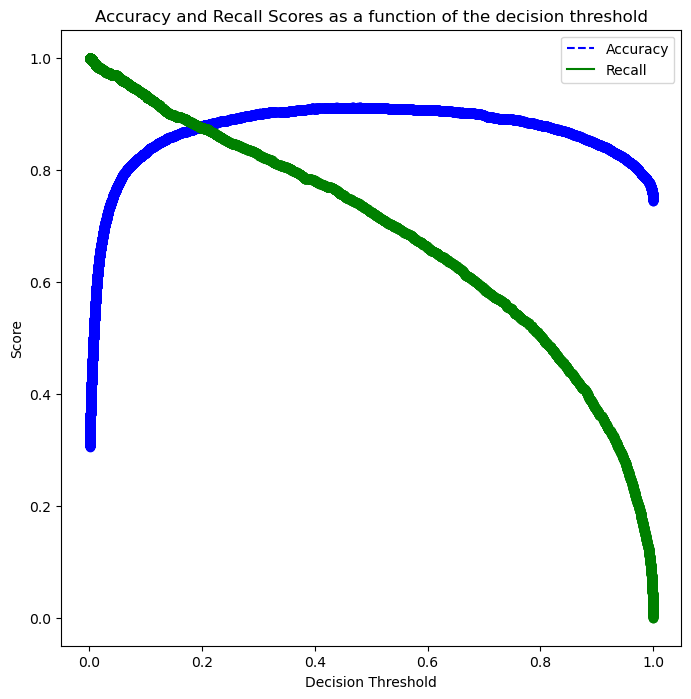

In [19]:
# Plot the graph of recall and accuracy
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
accuracy_list = []

for t in thresholds:
  y_pred_prob = tree.predict_proba(X_train)[:,1]
  y_pred = y_pred_prob > t
  y_pred = y_pred.astype(int)
  accuracy = (accuracy_score(y_pred, y_train))
  accuracy_list.append(accuracy)

def plot_accuracy_recall_vs_threshold(accuracy, recalls, thresholds):
  plt.figure(figsize=(8,8))
  plt.title("Accuracy and Recall Scores as a function of the decision threshold")
  plt.plot(thresholds, accuracy_list, "b--", label = "Accuracy")
  plt.plot(thresholds, recalls[:-1], 'g-', label = "Recall")
  plt.plot(thresholds, accuracy_list, 'o', color = 'blue')
  plt.plot(thresholds, recalls[:-1], 'o', color = 'green')
  plt.ylabel('Score')
  plt.xlabel('Decision Threshold')
  plt.legend(loc='best')
  plt.legend()
plot_accuracy_recall_vs_threshold(accuracy_list, r, thresholds)

Accuracy:  85.42999999999999
ROC-AUC:  0.9230603534300387
Precision:  0.6966770803748935
Recall:  0.8631245601688952


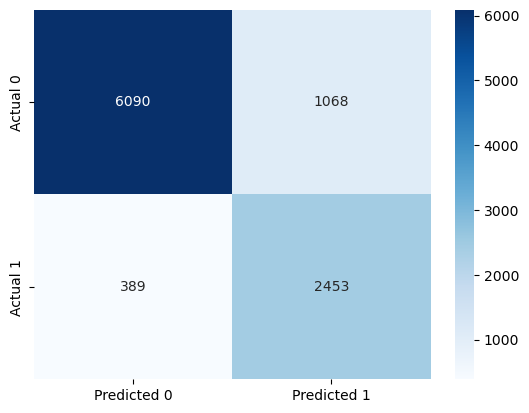

In [20]:
# Performance metrics computation for the optimum decision threshold probability = 0.231
desired_threshold = 0.231

tree.fit(X_train, y_train)

y_pred_prob = tree.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

This model recall is significantly improved compared to the baseline model (from 71.64% to 86.31) without compromising too much of the accuracy (from 86.14% to 85.43). Overall, this is one of our best model. One reason why the logistic regression model performs so well can be that the log(odds) of the response have a linear relationship with the predictors.

### PolynomialFeatures and Logistic Regression Model
*By Luna Nguyen*

*NOTE: I know that I ran the models earlier but of these codes are too computationally expensive to be running off of my computer so I will not excute them*

In [ ]:
from sklearn.model_selection import cross_validate

# Looping through different values of degree and C to find the optimal combination
hyperparam_vals_c = 10**np.linspace(-5,5)
hyperparam_vals_t = np.arange(0,1.01,0.01) 
variables_df = pd.DataFrame(columns = ['threshold', 'degree', 'C', 'accuracy', 'recall'])
iter_number = 0

for d in range(1,3):
    for c in hyperparam_vals_c: 
        new_predictors = PolynomialFeatures(d).fit_transform(X_train)
        cv = cross_validate(LogisticRegression(solver = 'newton-cg', C = c, max_iter = 1000),
                                        new_predictors, y_train, cv = 5, scoring = ['recall', 'accuracy'], n_jobs = -1)
        
        variables_df.loc[iter_number, 'degree'] = d
        variables_df.loc[iter_number, 'C'] = c
        mean_recall = cv['test_recall'].mean()
        variables_df.loc[iter_number, 'recall'] = mean_recall
        mean_accuracy = cv['test_accuracy'].mean()
        variables_df.loc[iter_number, 'accuracy'] = mean_accuracy
        iter_number += 1

In [ ]:
# Parameters for highest recall
optimal_C = variables_df.sort_values(by = 'recall', ascending = False).iloc[0,:]['C']
optimal_degree = variables_df.sort_values(by = 'recall', ascending = False). iloc[0, :]['degree']
optimal_recall = variables_df.sort_values(by = 'recall', ascending = False). iloc[0, :]['recall']
optimal_accuracy = variables_df.sort_values(by = 'recall', ascending = False). iloc[0, :]['accuracy']

#Optimal C
print("Optimal C = ", optimal_C)

#Optimal degreee
print("Optimal degree = ", optimal_degree)

#Optimal recall
print("Optimal recall = ", optimal_recall)

#Optimal accuracy
print("Optimal accuracy = ", optimal_accuracy)

In [23]:
# Transform the predictors using PolynomialFeatures(1)
# Since degree = 1 is the optimal degree, this model is basically the previous logistic regression
new_predictors = pd.DataFrame(PolynomialFeatures(1).fit_transform(X_train))

# Dropping the first column, which is added during the PolynomialFeatures transformation
new_predictors = new_predictors.drop(0, axis = 1)

In [24]:
# Develop a logistic regression with the optimal C value
poly_log = LogisticRegression(solver = 'newton-cg', C = 0.018420699693267165, max_iter = 1000).fit(new_predictors, y_train)

# Determining the best decision threshold
cross_val_ypred = cross_val_predict(LogisticRegression(solver = 'newton-cg', C = 0.018420699693267165, 
                                                       max_iter = 1000), new_predictors, 
                                              y_train, cv = 5, method = 'predict_proba')

metrics = pd.DataFrame()
i = 0
threshold_hyperparam = np.arange(0, 1.01, 0.001)

for threshold in threshold_hyperparam:
  predicted = cross_val_ypred[:, 1] > threshold
  predicted = predicted.astype(int)

  accuracy = accuracy_score(predicted, y_train)*100
  metrics.loc[i, 'threshold'] = threshold
  metrics.loc[i, 'accuracy'] = accuracy
  metrics.loc[i, 'recall'] = recall_score(y_train, predicted)*100
  
  i = i + 1
    
# Print a dataframe with the performance metrics for each decision threshold and then 
# choose the threshold where accuracy and recall are the most similar
metrics.iloc[range(220,230),:]

,threshold,accuracy,recall
220,0.220,85.70,86.133960
221,0.221,85.77,86.133960
222,0.222,85.79,86.094790
223,0.223,85.79,86.055621
224,0.224,85.81,85.977282
225,0.225,85.83,85.938112
226,0.226,85.84,85.938112
227,0.227,85.89,85.938112
228,0.228,85.89,85.781434
229,0.229,85.90,85.742264


Accuracy:  85.28
Recall:  0.8638282899366643


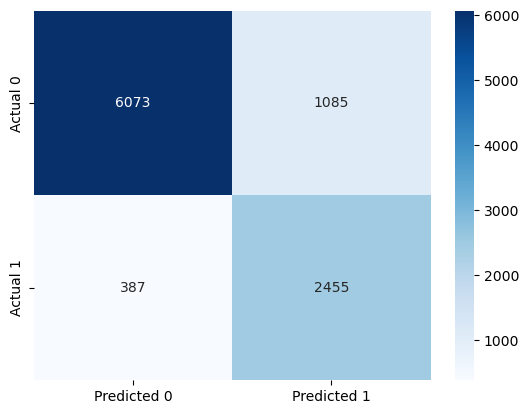

In [25]:
# Performance metrics computation for the optimum decision threshold probability = 0.227
desired_threshold = 0.227

y_pred_prob = poly_log.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the recall
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

This model gives me recall = 86.38% and accuracy = 85.28% which is just as good as the logistic regression. This makes sense because PolynomialFeatures degree = 1 is just like a normal logistic regression.

### Decision Tree Model
*By Luna Nguyen*

In [ ]:
# Model without any restrictions
model = DecisionTreeClassifier(random_state = 1).fit(X_train, y_train)

# Basal number of leaves
print(model.get_n_leaves())

# Basal depth
print(model.get_depth())

# Model without any restrictions
model = DecisionTreeClassifier(random_state = 1)

# Compute the pruning path during Minimal Cost-Complexity Pruning
path= model.cost_complexity_pruning_path(X_train,y_train)

# All the possible alpha values
alphas=path['ccp_alphas']

# Coarse Grid Search
param_grid = {    
    'max_depth': range(2, 26),
    'max_leaf_nodes': range(0, 339),
    'max_features': range(1, 163),
    'ccp_alpha':alphas
}

# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# RandomizedSearchCV to reduce computation complexity
grid_search_model = RandomizedSearchCV(DecisionTreeClassifier(random_state = 1), param_distributions = param_grid, 
                                       scoring = ['accuracy', 'recall'], refit = 'recall', n_jobs=-1, verbose=True,
                                       cv=cv, n_iter = 1000)

grid_search_model.fit(X_train, y_train)

# Printing the best parameters
print('Best params for recall')
print(grid_search_model.best_params_)

In [27]:
# Since it is a RandomizedSearchCV, it would give a different combination everytime. At the time I was doing this 
# Report, this is the best combination

# Developing the model
tree = DecisionTreeClassifier(random_state=1, max_depth = 3, max_leaf_nodes = 132, max_features=144, 
                              ccp_alpha = 0.0006011115616725905).fit(X_train, y_train)

# Tuning the decision threshold
cross_val_ypred = cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth = 3, max_leaf_nodes = 132, 
                                                           max_features=144, ccp_alpha = 0.0006011115616725905), 
                                    X_train, y_train, cv = 5, method = 'predict_proba')

metrics = pd.DataFrame()
i = 0
threshold_hyperparam = np.arange(0, 1.01, 0.001)

for threshold in threshold_hyperparam:
  predicted = cross_val_ypred[:, 1] > threshold
  predicted = predicted.astype(int)

  accuracy = accuracy_score(predicted, y_train)*100
  metrics.loc[i, 'threshold'] = threshold
  metrics.loc[i, 'accuracy'] = accuracy
  metrics.loc[i, 'recall'] = recall_score(y_train, predicted)*100
  
  i = i + 1

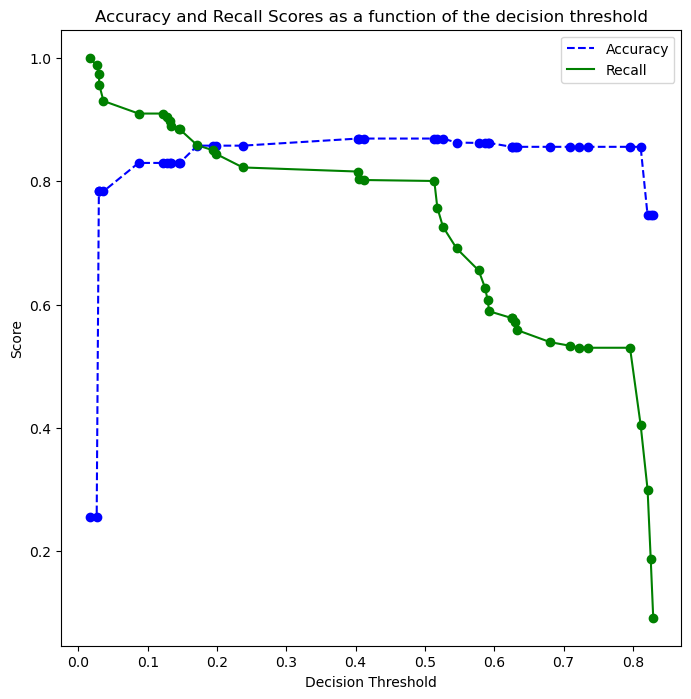

In [28]:
cross_val_ypred = cross_val_predict(tree, X_train, y_train, cv = 5, method = 'predict_proba')

tree.fit(X_train, y_train)

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
accuracy_list = []

for t in thresholds:
  y_pred_prob = tree.predict_proba(X_train)[:,1]
  y_pred = y_pred_prob > t
  y_pred = y_pred.astype(int)
  accuracy = (accuracy_score(y_pred, y_train))
  accuracy_list.append(accuracy)

def plot_accuracy_recall_vs_threshold(accuracy, recalls, thresholds):
  plt.figure(figsize=(8,8))
  plt.title("Accuracy and Recall Scores as a function of the decision threshold")
  plt.plot(thresholds, accuracy_list, "b--", label = "Accuracy")
  plt.plot(thresholds, recalls[:-1], 'g-', label = "Recall")
  plt.plot(thresholds, accuracy_list, 'o', color = 'blue')
  plt.plot(thresholds, recalls[:-1], 'o', color = 'green')
  plt.ylabel('Score')
  plt.xlabel('Decision Threshold')
  plt.legend(loc='best')
  plt.legend()
plot_accuracy_recall_vs_threshold(accuracy_list, r, thresholds)

Even though the threshold at which accuracy and recall are roughly the same for the train data is around 0.25, this didn't give me a good enough performance metrics on my test data (both accuracy and recall above 80%), so I manually tuned my final model's decision threshold.

Accuracy:  77.84
ROC-AUC:  0.8703815644823122
Precision:  0.5701793721973094
Recall:  0.8947923997185081


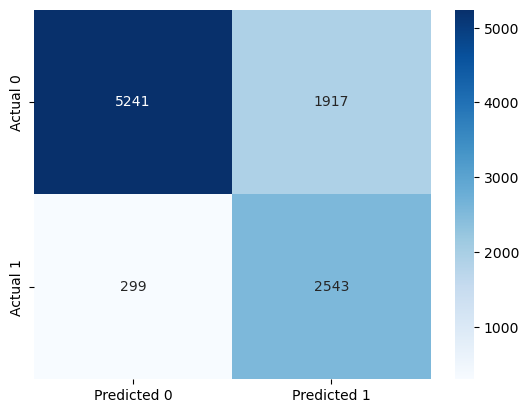

In [30]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.071000

tree.fit(X_train, y_train)

y_pred_prob = tree.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

However, I couldn't attain my goal. Therefore, I decided to continue doing a finer RandomizedSearch focusing on the optimal metrics from the previous search and use a bigger n_iter to hopefully capture the optimal combination. 

In [ ]:
# Fine grid search
param_grid = {    
    'max_depth': range(2, 10),
    'max_leaf_nodes': range(125, 140),
    'max_features': range(140, 150),
    'ccp_alpha':alphas
}


# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# Developing the gridsearch
grid_search_model = RandomizedSearchCV(DecisionTreeClassifier(random_state = 1), param_distributions = param_grid, 
                                       scoring = ['accuracy', 'recall'], refit = 'recall', n_jobs=-1, verbose=True,
                                       cv=cv, n_iter = 2000)

grid_search_model.fit(X_train, y_train)

# Printing the optimal parameters
print('Best params for recall')
print(grid_search_model.best_params_)

In [33]:
# Since it is a RandomizedSearchCV, it would give a different combination everytime. At the time I was doing this 
# Report, this is the best combination

# Developing the model
tree = DecisionTreeClassifier(random_state=1, max_depth = 8, max_leaf_nodes=139, max_features=148, 
                              ccp_alpha = 0.004313741792369128).fit(X_train, y_train)

# Tuning the decision threshold
cross_val_ypred = cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth = 8, max_leaf_nodes=139, 
                                                           max_features=148, ccp_alpha = 0.004313741792369128), 
                                    X_train, y_train, cv = 5, method = 'predict_proba')

metrics = pd.DataFrame()
i = 0
threshold_hyperparam = np.arange(0, 1.01, 0.001)

for threshold in threshold_hyperparam:
  predicted = cross_val_ypred[:, 1] > threshold
  predicted = predicted.astype(int)

  accuracy = accuracy_score(predicted, y_train)*100
  metrics.loc[i, 'threshold'] = threshold
  metrics.loc[i, 'accuracy'] = accuracy
  metrics.loc[i, 'recall'] = recall_score(y_train, predicted)*100
  
  i = i + 1

# Print a dataframe with the performance metrics for each decision threshold and then 
# choose the threshold where accuracy and recall are the most similar
metrics.iloc[225:235]

,threshold,accuracy,recall
225,0.225,83.01,82.843713
226,0.226,83.01,82.843713
227,0.227,83.01,82.843713
228,0.228,83.01,82.843713
229,0.229,83.01,82.843713
230,0.230,83.01,82.843713
231,0.231,83.01,82.843713
232,0.232,83.01,82.843713
233,0.233,83.01,82.843713
234,0.234,83.01,82.843713


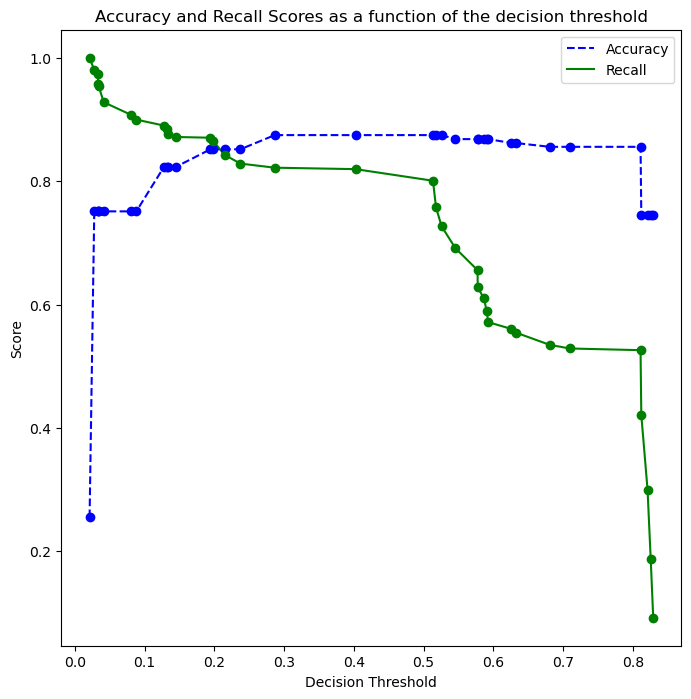

In [34]:
tree = DecisionTreeClassifier(random_state=1, max_depth = 8, max_leaf_nodes=139, max_features=148, 
                              ccp_alpha = 0.004313741792369128)

cross_val_ypred = cross_val_predict(tree, X_train, y_train, cv = 5, method = 'predict_proba')

tree.fit(X_train, y_train)

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
accuracy_list = []

for t in thresholds:
  y_pred_prob = tree.predict_proba(X_train)[:,1]
  y_pred = y_pred_prob > t
  y_pred = y_pred.astype(int)
  accuracy = (accuracy_score(y_pred, y_train))
  accuracy_list.append(accuracy)

def plot_accuracy_recall_vs_threshold(accuracy, recalls, thresholds):
  plt.figure(figsize=(8,8))
  plt.title("Accuracy and Recall Scores as a function of the decision threshold")
  plt.plot(thresholds, accuracy_list, "b--", label = "Accuracy")
  plt.plot(thresholds, recalls[:-1], 'g-', label = "Recall")
  plt.plot(thresholds, accuracy_list, 'o', color = 'blue')
  plt.plot(thresholds, recalls[:-1], 'o', color = 'green')
  plt.ylabel('Score')
  plt.xlabel('Decision Threshold')
  plt.legend(loc='best')
  plt.legend()
plot_accuracy_recall_vs_threshold(accuracy_list, r, thresholds)

Accuracy:  83.24000000000001
ROC-AUC:  0.8795749316866961
Precision:  0.6686921296296297
Recall:  0.8131597466572836


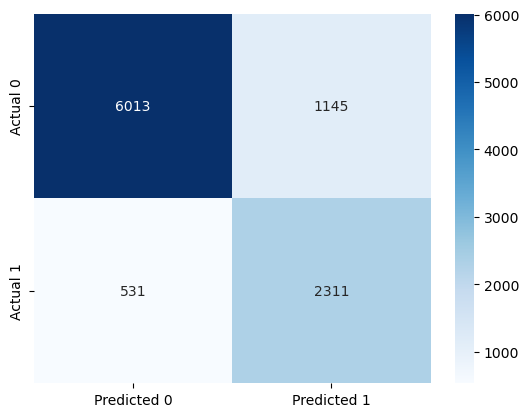

In [35]:
# Performance metrics computation for the optimum decision threshold probability = 0.231
desired_threshold = 0.231

tree.fit(X_train, y_train)

y_pred_prob = tree.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

These hyperparameters and decision threshold produces a model with a good accuracy at 83.24% and a good recall at 81.32%. Even though these metrics are good, they are not as good as our logistic regression model.

### MARS, AdaBoost & LightGBM
*By Sankaranarayanan Balasubramanian*

### Bagged trees & Random forest
*By Fiona Fe*

### XGBoost
*By Ryu Kimiko*

## Model Ensemble 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**


### Voting ensemble

### Stacking ensemble(s)

### Ensemble of ensembled models

### Innovative ensembling methods
*(Optional)*

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.